## 전처리 코드

In [1]:
import pandas as pd

from utils import load_dataset
from config import DATA_DIR

### 데이터 불러오기

In [2]:
games_details = load_dataset('games_details')
games = load_dataset('games')
ranking = load_dataset('ranking')

### 필요한 컬럼만 남김

In [3]:
drop_cols = ['TEAM_ABBREVIATION', 'TEAM_CITY', 'NICKNAME', 'PLAYER_NAME', 'COMMENT']
games_details.drop(columns=drop_cols, inplace=True)
games_details.head(10)

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,1629641,F,18.100000,1.0,1.0,1.000,0.0,0.0,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,1631110,F,31.016667,7.0,14.0,0.500,2.0,4.0,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,1627751,C,21.700000,6.0,9.0,0.667,0.0,0.0,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,1630170,G,30.333333,4.0,13.0,0.308,1.0,6.0,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,1630200,G,27.733333,7.0,12.0,0.583,1.0,3.0,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
5,22200477,1610612759,1628380,NaN,18.066667,2.0,6.0,0.333,0.0,0.0,...,1.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,6.0,-13.0
6,22200477,1610612759,203926,NaN,16.916667,2.0,8.0,0.250,1.0,5.0,...,1.0,3.0,4.0,1.0,0.0,0.0,1.0,0.0,5.0,-10.0
7,22200477,1610612759,1626196,NaN,21.333333,5.0,11.0,0.455,2.0,5.0,...,1.0,2.0,3.0,3.0,0.0,0.0,1.0,2.0,14.0,-2.0
8,22200477,1610612759,1631103,NaN,21.166667,4.0,6.0,0.667,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,9.0,-6.0
9,22200477,1610612759,1628966,NaN,9.266667,1.0,3.0,0.333,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,-1.0


In [4]:
drop_cols = ['GAME_STATUS_TEXT']
games.drop(columns=drop_cols, inplace=True)
games.head(10)

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
5,2022-12-21,22200469,1610612738,1610612754,2022,1610612738,112.0,0.386,0.840,0.317,26.0,62.0,1610612754,117.0,0.469,0.778,0.462,27.0,47.0,0
6,2022-12-21,22200470,1610612751,1610612744,2022,1610612751,143.0,0.643,0.875,0.636,42.0,32.0,1610612744,113.0,0.494,0.760,0.364,32.0,36.0,1
7,2022-12-21,22200471,1610612752,1610612761,2022,1610612752,106.0,0.553,0.611,0.423,25.0,38.0,1610612761,113.0,0.447,0.909,0.265,17.0,38.0,0
8,2022-12-21,22200472,1610612745,1610612753,2022,1610612745,110.0,0.466,0.647,0.395,22.0,49.0,1610612753,116.0,0.451,0.697,0.297,19.0,45.0,0
9,2022-12-21,22200473,1610612750,1610612742,2022,1610612750,99.0,0.494,0.700,0.267,23.0,39.0,1610612742,104.0,0.453,0.852,0.333,17.0,39.0,0


In [5]:
drop_cols = ['LEAGUE_ID', 'RETURNTOPLAY']
ranking.drop(columns=drop_cols, inplace=True)
ranking.head(10)

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612743,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8
1,1610612763,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9
2,1610612740,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8
3,1610612756,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9
4,1610612746,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7
5,1610612758,22022,2022-12-22,West,Sacramento,30,17,13,0.567,9-5,8-8
6,1610612762,22022,2022-12-22,West,Utah,35,19,16,0.543,12-5,7-11
7,1610612757,22022,2022-12-22,West,Portland,32,17,15,0.531,7-6,10-9
8,1610612742,22022,2022-12-22,West,Dallas,32,16,16,0.500,12-5,4-11
9,1610612750,22022,2022-12-22,West,Minnesota,32,16,16,0.500,9-8,7-8


### ranking 팀 이름 변경

In [6]:
team_replace = {
    'New Orleans/Oklahoma City': 'New Orleans',
    'LA Clippers': 'L.A. Clippers',
    'New Jersey': 'Brooklyn',
    'Seattle': 'Oklahoma City'
}

for old, new in team_replace.items():
    ranking['TEAM'] = ranking['TEAM'].str.replace(old, new)

ranking['TEAM'].nunique()

30

### 시즌 2019~2022만 포함

In [7]:
seasons = [2019, 2020, 2021, 2022]
season_dates = games[games['SEASON'].isin(seasons)]['GAME_DATE_EST'].tolist()
season_dates = set(season_dates)

In [8]:
games_details_season = pd.merge(games_details, games[['GAME_DATE_EST', 'GAME_ID', 'SEASON']], how='inner', on='GAME_ID').copy()
games_details_season = games_details_season[games_details_season['GAME_DATE_EST'].isin(season_dates)] 

In [9]:
games_details_season

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GAME_DATE_EST,SEASON
0,22200477,1610612759,1629641,F,18.100000,1.0,1.0,1.000,0.0,0.0,...,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0,2022-12-22,2022
1,22200477,1610612759,1631110,F,31.016667,7.0,14.0,0.500,2.0,4.0,...,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0,2022-12-22,2022
2,22200477,1610612759,1627751,C,21.700000,6.0,9.0,0.667,0.0,0.0,...,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0,2022-12-22,2022
3,22200477,1610612759,1630170,G,30.333333,4.0,13.0,0.308,1.0,6.0,...,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0,2022-12-22,2022
4,22200477,1610612759,1630200,G,27.733333,7.0,12.0,0.583,1.0,3.0,...,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0,2022-12-22,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414522,11900003,1610612758,1628399,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-04,2019
414523,11900003,1610612758,1628450,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-04,2019
414524,11900003,1610612758,1629753,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-04,2019
414525,11900003,1610612758,1628403,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-04,2019


In [10]:
games_season = games[games['GAME_DATE_EST'].isin(season_dates)].copy()
ranking_season = ranking[ranking['STANDINGSDATE'].isin(season_dates)].copy()

In [11]:
games_details_season.rename(columns={'GAME_DATE_EST': 'DATE'}, inplace=True)
games_season.rename(columns={'GAME_DATE_EST': 'DATE'}, inplace=True)
ranking_season.rename(columns={'STANDINGSDATE': 'DATE'}, inplace=True)

In [12]:
ranking_season.sort_values('DATE')

,TEAM_ID,SEASON_ID,DATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
182456,1610612764,12019,2019-10-04,East,Washington,0,0,0,0.000,0-0,0-0
93849,1610612757,12019,2019-10-04,West,Portland,0,0,0,0.000,0-0,0-0
93848,1610612756,12019,2019-10-04,West,Phoenix,0,0,0,0.000,0-0,0-0
93847,1610612760,12019,2019-10-04,West,Oklahoma City,0,0,0,0.000,0-0,0-0
93846,1610612740,12019,2019-10-04,West,New Orleans,0,0,0,0.000,0-0,0-0
...,...,...,...,...,...,...,...,...,...,...,...
4279,1610612755,22022,2022-12-22,East,Philadelphia,30,18,12,0.600,13-5,5-7
4278,1610612751,22022,2022-12-22,East,Brooklyn,32,20,12,0.625,11-5,9-7
4277,1610612739,22022,2022-12-22,East,Cleveland,33,22,11,0.667,16-2,6-9
4275,1610612749,22022,2022-12-22,East,Milwaukee,31,22,9,0.710,14-3,8-6


### 중복 제거

In [13]:
games_details_season.shape

(117844, 26)

In [14]:
games_details_season[games_details_season.duplicated(subset=['GAME_ID', 'PLAYER_ID'], keep=False)].sort_values(by=['GAME_ID', 'PLAYER_ID'])

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DATE,SEASON
68833,22000001,1610612751,201142,F,24.933333,7.0,16.0,0.438,1.0,2.0,...,5.0,3.0,3.0,1.0,1.0,3.0,22.0,26.0,2020-12-22,2020
83754,22000001,1610612751,201142,F,24.933333,7.0,16.0,0.438,1.0,2.0,...,5.0,3.0,3.0,1.0,1.0,3.0,22.0,26.0,2020-12-22,2020
68823,22000001,1610612744,201939,G,30.316667,7.0,21.0,0.333,2.0,10.0,...,4.0,10.0,2.0,0.0,3.0,1.0,20.0,-23.0,2020-12-22,2020
83752,22000001,1610612744,201939,G,30.316667,7.0,21.0,0.333,2.0,10.0,...,4.0,10.0,2.0,0.0,3.0,1.0,20.0,-23.0,2020-12-22,2020
68835,22000001,1610612751,203915,G,19.950000,2.0,6.0,0.333,1.0,3.0,...,5.0,4.0,0.0,0.0,3.0,1.0,9.0,24.0,2020-12-22,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83437,22000078,1610612744,1626162,G,28.116667,4.0,12.0,0.333,0.0,4.0,...,4.0,0.0,0.0,1.0,2.0,2.0,10.0,-20.0,2021-01-01,2020
66308,22000078,1610612757,1628385,NaN,13.800000,1.0,3.0,0.333,0.0,0.0,...,5.0,2.0,0.0,1.0,2.0,3.0,3.0,3.0,2021-01-01,2020
83435,22000078,1610612757,1628385,NaN,13.800000,1.0,3.0,0.333,0.0,0.0,...,5.0,2.0,0.0,1.0,2.0,3.0,3.0,3.0,2021-01-01,2020
66321,22000078,1610612744,1628539,NaN,10.483333,1.0,3.0,0.333,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2021-01-01,2020


In [15]:
games_details_season.drop_duplicates(subset=['GAME_ID', 'PLAYER_ID'], inplace=True)

In [16]:
games_season[games_season.duplicated(subset=['GAME_ID'], keep=False)].sort_values('GAME_ID')

,DATE,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
2535,2020-12-25,22000006,1610612749,1610612744,2020,1610612749,138.0,0.556,0.692,0.556,25.0,60.0,1610612744,99.0,0.343,0.840,0.222,14.0,43.0,1
3125,2020-12-25,22000006,1610612749,1610612744,2020,1610612749,138.0,0.556,0.692,0.556,25.0,60.0,1610612744,99.0,0.343,0.840,0.222,14.0,43.0,1
3126,2020-12-25,22000007,1610612738,1610612751,2020,1610612738,95.0,0.378,0.684,0.296,23.0,47.0,1610612751,123.0,0.539,0.839,0.517,21.0,43.0,0
2536,2020-12-25,22000007,1610612738,1610612751,2020,1610612738,95.0,0.378,0.684,0.296,23.0,47.0,1610612751,123.0,0.539,0.839,0.517,21.0,43.0,0
2540,2020-12-23,22000011,1610612754,1610612752,2020,1610612754,121.0,0.489,0.724,0.235,28.0,50.0,1610612752,107.0,0.459,0.739,0.429,25.0,40.0,1
3127,2020-12-23,22000011,1610612754,1610612752,2020,1610612754,121.0,0.489,0.724,0.235,28.0,50.0,1610612752,107.0,0.459,0.739,0.429,25.0,40.0,1
3128,2020-12-23,22000013,1610612755,1610612764,2020,1610612755,113.0,0.471,0.767,0.286,22.0,47.0,1610612764,107.0,0.459,0.696,0.481,28.0,40.0,1
2542,2020-12-23,22000013,1610612755,1610612764,2020,1610612755,113.0,0.471,0.767,0.286,22.0,47.0,1610612764,107.0,0.459,0.696,0.481,28.0,40.0,1
2545,2020-12-23,22000015,1610612741,1610612737,2020,1610612741,104.0,0.414,0.857,0.229,20.0,37.0,1610612737,124.0,0.538,0.828,0.400,24.0,46.0,0
3129,2020-12-23,22000015,1610612741,1610612737,2020,1610612741,104.0,0.414,0.857,0.229,20.0,37.0,1610612737,124.0,0.538,0.828,0.400,24.0,46.0,0


In [17]:
games_season.drop_duplicates(subset=['GAME_ID'], inplace=True)

In [18]:
ranking_season[ranking_season.duplicated(subset=['TEAM_ID', 'DATE'], keep=False)].sort_values(by=['TEAM_ID', 'DATE'])

,TEAM_ID,SEASON_ID,DATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
19507,1610612738,22020,2020-12-27,East,Boston,3,1,2,0.333,1-1,0-1
22013,1610612738,22020,2020-12-27,East,Boston,3,1,2,0.333,1-1,0-1
19492,1610612738,22020,2020-12-28,East,Boston,3,1,2,0.333,1-1,0-1
22009,1610612738,22020,2020-12-28,East,Boston,3,1,2,0.333,1-1,0-1
19436,1610612741,22020,2021-01-01,East,Chicago,6,2,4,0.333,0-3,2-1
22006,1610612741,22020,2021-01-01,East,Chicago,6,2,4,0.333,0-3,2-1
19315,1610612742,22020,2020-12-27,West,Dallas,3,1,2,0.333,0-0,1-2
20950,1610612742,22020,2020-12-27,West,Dallas,3,1,2,0.333,0-0,1-2
19300,1610612742,22020,2020-12-28,West,Dallas,3,1,2,0.333,0-0,1-2
20946,1610612742,22020,2020-12-28,West,Dallas,3,1,2,0.333,0-0,1-2


In [19]:
ranking_season.drop_duplicates(subset=['TEAM_ID', 'DATE'], inplace=True)

### MIN이 0이면서 실제로 경기를 실행한 경우 조사

In [20]:
min_cond = games_details_season['MIN'] == 0
min0_games_details = games_details_season[min_cond]
print(min0_games_details.shape)
min0_games_details.isnull().sum()

(21603, 26)


GAME_ID               0
TEAM_ID               0
PLAYER_ID             0
START_POSITION    21603
MIN                   0
FGM               21590
FGA               21590
FG_PCT            21590
FG3M              21590
FG3A              21590
FG3_PCT           21590
FTM               21590
FTA               21590
FT_PCT            21590
OREB              21590
DREB              21590
REB               21590
AST               21590
STL               21590
BLK               21590
TO                21590
PF                21590
PTS               21590
PLUS_MINUS        21590
DATE                  0
SEASON                0
dtype: int64

In [21]:
min0_games_details[~min0_games_details['FGM'].isna()]

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DATE,SEASON
20673,22101086,1610612758,1629674,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-23,2021
24003,22100954,1610612742,1626246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-05,2021
44475,22100151,1610612743,1629626,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-11-08,2021
46488,22100074,1610612740,1626195,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-10-29,2021
73396,22000485,1610612738,1629605,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-02-23,2020
86014,41900301,1610612738,202683,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-15,2019
86819,41900175,1610612745,2199,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-29,2019
88642,21901281,1610612762,1629730,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-08,2019
88654,21901281,1610612743,1629626,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08-08,2019
95944,21900770,1610612742,1626246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-07,2019


### 결측치 처리

In [22]:
games_details_season.isnull().sum()

GAME_ID               0
TEAM_ID               0
PLAYER_ID             0
START_POSITION    72703
MIN                   0
FGM               21590
FGA               21590
FG_PCT            21590
FG3M              21590
FG3A              21590
FG3_PCT           21590
FTM               21590
FTA               21590
FT_PCT            21590
OREB              21590
DREB              21590
REB               21590
AST               21590
STL               21590
BLK               21590
TO                21590
PF                21590
PTS               21590
PLUS_MINUS        21590
DATE                  0
SEASON                0
dtype: int64

In [23]:
games_season.isnull().sum()

DATE               0
GAME_ID            0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
TEAM_ID_home       0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
TEAM_ID_away       0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [24]:
ranking_season.isnull().sum()

TEAM_ID        0
SEASON_ID      0
DATE           0
CONFERENCE     0
TEAM           0
G              0
W              0
L              0
W_PCT          0
HOME_RECORD    0
ROAD_RECORD    0
dtype: int64

#### START_POSITION 결측치 처리

In [25]:
# 선발 중에 결측치는 없는지 확인
games_details_season.groupby(by=['GAME_ID', 'TEAM_ID']).agg({'START_POSITION': 'count'}).nunique()

START_POSITION    1
dtype: int64

In [26]:
# MIN이 0이면 DNP로 대체
games_details_season.loc[games_details_season['MIN'] == 0, 'START_POSITION'] = 'DNP'

# START_POSITION이 NULL이면 SUB로 대체
games_details_season['START_POSITION'].fillna('SUB')

0           F
1           F
2           C
3           G
4           G
         ... 
414522    DNP
414523    DNP
414524    DNP
414525    DNP
414526    DNP
Name: START_POSITION, Length: 116623, dtype: object

In [27]:
games_details_season['START_POSITION'].value_counts()

START_POSITION
DNP    21603
F      17568
G      17568
C       8784
Name: count, dtype: int64

#### 스탯 결측치 처리

In [28]:
# DNP들의 스탯은 0으로 한다.
games_details_season.fillna(0, inplace=True)

### 타입 변환

In [29]:
games_details_season.dtypes

GAME_ID                    int64
TEAM_ID                    int64
PLAYER_ID                  int64
START_POSITION            object
MIN                      float64
FGM                      float64
FGA                      float64
FG_PCT                   float64
FG3M                     float64
FG3A                     float64
FG3_PCT                  float64
FTM                      float64
FTA                      float64
FT_PCT                   float64
OREB                     float64
DREB                     float64
REB                      float64
AST                      float64
STL                      float64
BLK                      float64
TO                       float64
PF                       float64
PTS                      float64
PLUS_MINUS               float64
DATE              datetime64[ns]
SEASON                     int64
dtype: object

In [30]:
games_season.dtypes

DATE               datetime64[ns]
GAME_ID                     int64
HOME_TEAM_ID                int64
VISITOR_TEAM_ID             int64
SEASON                      int64
TEAM_ID_home                int64
PTS_home                  float64
FG_PCT_home               float64
FT_PCT_home               float64
FG3_PCT_home              float64
AST_home                  float64
REB_home                  float64
TEAM_ID_away                int64
PTS_away                  float64
FG_PCT_away               float64
FT_PCT_away               float64
FG3_PCT_away              float64
AST_away                  float64
REB_away                  float64
HOME_TEAM_WINS              int64
dtype: object

In [31]:
ranking_season.dtypes

TEAM_ID                 int64
SEASON_ID              object
DATE           datetime64[ns]
CONFERENCE             object
TEAM                   object
G                       int64
W                       int64
L                       int64
W_PCT                 float64
HOME_RECORD            object
ROAD_RECORD            object
dtype: object

#### value_counts로 정수가 아닌 실수형이 있는지 확인

In [32]:
games_details_season['PF'].value_counts()

PF
0.0    41315
1.0    23586
2.0    21739
3.0    15589
4.0     9213
5.0     4163
6.0     1018
Name: count, dtype: int64

In [33]:
games_season['REB_away'].value_counts()

REB_away
47.0    275
45.0    269
43.0    259
42.0    254
41.0    251
44.0    242
40.0    223
46.0    222
48.0    218
39.0    213
38.0    202
49.0    194
37.0    169
50.0    152
51.0    145
36.0    128
52.0    118
35.0    115
53.0     95
34.0     85
54.0     81
55.0     67
56.0     65
33.0     61
32.0     42
31.0     41
57.0     35
30.0     29
59.0     25
29.0     22
58.0     22
60.0     16
61.0     12
62.0     10
28.0      9
27.0      7
65.0      5
63.0      4
25.0      3
64.0      2
24.0      1
23.0      1
66.0      1
68.0      1
26.0      1
Name: count, dtype: int64

#### 타입 딕셔너리 만든 후 변환

In [34]:
int_cols = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']
type_dict = {col: int for col in int_cols}
type_dict['START_POSITION'] = 'category'
games_details_season = games_details_season.astype(type_dict)
games_details_season.dtypes

GAME_ID                    int64
TEAM_ID                    int64
PLAYER_ID                  int64
START_POSITION          category
MIN                      float64
FGM                        int64
FGA                        int64
FG_PCT                   float64
FG3M                       int64
FG3A                       int64
FG3_PCT                  float64
FTM                        int64
FTA                        int64
FT_PCT                   float64
OREB                       int64
DREB                     float64
REB                        int64
AST                        int64
STL                        int64
BLK                        int64
TO                         int64
PF                         int64
PTS                        int64
PLUS_MINUS                 int64
DATE              datetime64[ns]
SEASON                     int64
dtype: object

In [35]:
int_cols = ['PTS_home', 'AST_home', 'REB_home', 'PTS_away', 'AST_away', 'REB_away']
type_dict = {col: int for col in int_cols}
games_season = games_season.astype(type_dict)
games_season.dtypes

DATE               datetime64[ns]
GAME_ID                     int64
HOME_TEAM_ID                int64
VISITOR_TEAM_ID             int64
SEASON                      int64
TEAM_ID_home                int64
PTS_home                    int64
FG_PCT_home               float64
FT_PCT_home               float64
FG3_PCT_home              float64
AST_home                    int64
REB_home                    int64
TEAM_ID_away                int64
PTS_away                    int64
FG_PCT_away               float64
FT_PCT_away               float64
FG3_PCT_away              float64
AST_away                    int64
REB_away                    int64
HOME_TEAM_WINS              int64
dtype: object

In [36]:
category_cols = ['CONFERENCE', 'TEAM']
type_dict = {col: 'category' for col in category_cols}
ranking_season = ranking_season.astype(type_dict)
ranking_season.dtypes

TEAM_ID                 int64
SEASON_ID              object
DATE           datetime64[ns]
CONFERENCE           category
TEAM                 category
G                       int64
W                       int64
L                       int64
W_PCT                 float64
HOME_RECORD            object
ROAD_RECORD            object
dtype: object

### DATE 컬럼을 INDEX로

In [37]:
games_details_season.set_index('DATE', inplace=True)
games_season.set_index('DATE', inplace=True)
ranking_season.set_index('DATE', inplace=True)

In [38]:
games_details_season

,GAME_ID,TEAM_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
DATE,,,,,,,,,,,,,,,,,,,,,
2022-12-22,22200477,1610612759,1629641,F,18.100000,1,1,1.000,0,0,...,1.0,2,0,1,0,2,5,2,-2,2022
2022-12-22,22200477,1610612759,1631110,F,31.016667,7,14,0.500,2,4,...,3.0,9,6,1,0,2,1,23,-14,2022
2022-12-22,22200477,1610612759,1627751,C,21.700000,6,9,0.667,0,0,...,3.0,4,1,1,0,2,4,13,-4,2022
2022-12-22,22200477,1610612759,1630170,G,30.333333,4,13,0.308,1,6,...,9.0,9,5,3,0,2,1,10,-18,2022
2022-12-22,22200477,1610612759,1630200,G,27.733333,7,12,0.583,1,3,...,2.0,2,3,0,0,2,2,19,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-04,11900003,1610612758,1628399,DNP,0.000000,0,0,0.000,0,0,...,0.0,0,0,0,0,0,0,0,0,2019
2019-10-04,11900003,1610612758,1628450,DNP,0.000000,0,0,0.000,0,0,...,0.0,0,0,0,0,0,0,0,0,2019
2019-10-04,11900003,1610612758,1629753,DNP,0.000000,0,0,0.000,0,0,...,0.0,0,0,0,0,0,0,0,0,2019


### MIN > 0 필터링

In [39]:
games_details_season = games_details_season[games_details_season['MIN'] > 0].copy()

In [40]:
games_details_season['MIN'].min()

0.016666666666666666

### 이상치 탐지

In [41]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import platform

# OS 자동 감지 및 한글 폰트 설정
system = platform.system()

if system == 'Windows':
    # Windows: 맑은 고딕 사용
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
elif system == 'Darwin':  # Darwin = macOS
    # macOS: 애플 고딕 사용
    plt.rcParams['font.family'] = 'AppleGothic'
    
elif system == 'Linux':
    # Linux: 나눔 고딕 사용 (사전 설치 필요)
    # 터미널: sudo apt-get install -y fonts-nanum
    plt.rcParams['font.family'] = 'NanumGothic'
    
else:
    print(f"알 수 없는 OS: {system}")

# 모든 OS 공통: 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print(f"OS: {system}, 설정된 폰트: {plt.rcParams['font.family']}")

OS: Linux, 설정된 폰트: ['NanumGothic']


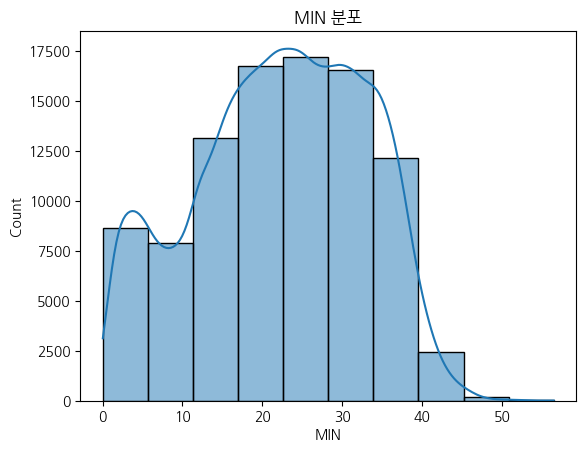

In [42]:
sns.histplot(data=games_details_season, x="MIN", bins=10, kde=True) 
plt.title("MIN 분포")
plt.show()


In [43]:
games_details_season.describe()

,GAME_ID,TEAM_ID,PLAYER_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
count,9.502000e+04,9.502000e+04,9.502000e+04,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000,...,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000,95020.000000
mean,2.245747e+07,1.610613e+09,1.113021e+06,22.315774,3.762345,8.152105,0.428243,1.148948,3.212292,0.256172,...,3.176268,4.109356,2.262860,0.705094,0.445201,1.263450,1.869143,10.289571,0.000042,2020.285645
std,5.771998e+06,8.616347e+00,6.890668e+05,10.623312,3.157990,5.884873,0.252719,1.463831,2.990194,0.291209,...,2.730223,3.425803,2.524454,0.944107,0.804509,1.404694,1.475989,8.558674,11.294691,1.010115
min,1.190000e+07,1.610613e+09,1.713000e+03,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56.000000,2019.000000
25%,2.190076e+07,1.610613e+09,2.034860e+05,14.733333,1.000000,4.000000,0.286000,0.000000,1.000000,0.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.000000,2019.000000
50%,2.200082e+07,1.610613e+09,1.627884e+06,22.966667,3.000000,7.000000,0.444000,1.000000,3.000000,0.200000,...,3.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,2020.000000
75%,2.210085e+07,1.610613e+09,1.629626e+06,30.816667,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,...,5.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,7.000000,2021.000000
max,5.210021e+07,1.610613e+09,1.631371e+06,56.516667,22.000000,41.000000,1.000000,13.000000,22.000000,1.000000,...,21.000000,30.000000,24.000000,10.000000,10.000000,11.000000,6.000000,62.000000,54.000000,2022.000000


In [44]:
games_season.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,4.392000e+03,4.392000e+03,4.392000e+03,4392.000000,4.392000e+03,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,2.264556e+07,1.610613e+09,1.610613e+09,2020.280510,1.610613e+09,112.228370,0.465925,0.774923,0.359885,24.887523,44.933743,1.610613e+09,110.385246,0.459058,0.774753,0.353939,24.069444,43.971311,0.550319
std,5.637853e+06,8.587363e+00,8.630861e+00,1.006969,8.587363e+00,12.513786,0.055792,0.100548,0.084368,4.953954,6.676773,8.630861e+00,12.444110,0.054346,0.103520,0.084211,4.923783,6.562011,0.497518
min,1.190000e+07,1.610613e+09,1.610613e+09,2019.000000,1.610613e+09,59.000000,0.269000,0.308000,0.089000,10.000000,24.000000,1.610613e+09,70.000000,0.277000,0.300000,0.077000,8.000000,23.000000,0.000000
25%,2.190082e+07,1.610613e+09,1.610613e+09,2019.000000,1.610613e+09,104.000000,0.427000,0.710000,0.303000,21.000000,40.000000,1.610613e+09,102.000000,0.421000,0.711000,0.296750,21.000000,39.000000,0.000000
50%,2.200086e+07,1.610613e+09,1.610613e+09,2020.000000,1.610613e+09,112.000000,0.465000,0.781000,0.359000,25.000000,45.000000,1.610613e+09,110.000000,0.457000,0.778000,0.353000,24.000000,44.000000,1.000000
75%,2.210088e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,121.000000,0.505000,0.846000,0.417000,28.000000,49.000000,1.610613e+09,119.000000,0.495000,0.846000,0.410000,27.000000,48.000000,1.000000
max,5.210021e+07,1.610613e+09,1.610613e+09,2022.000000,1.610613e+09,158.000000,0.655000,1.000000,0.720000,50.000000,70.000000,1.610613e+09,159.000000,0.687000,1.000000,0.680000,41.000000,68.000000,1.000000


In [45]:
ranking_season.describe()

,TEAM_ID,G,W,L,W_PCT
count,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000
mean,1.610613e+09,40.183565,20.095787,20.087778,0.492261
std,8.655642e+00,27.025600,15.276456,15.193423,0.207434
min,1.610613e+09,0.000000,0.000000,0.000000,0.000000
25%,1.610613e+09,15.000000,7.000000,7.000000,0.364000
50%,1.610613e+09,39.000000,18.000000,18.000000,0.500000
75%,1.610613e+09,67.000000,31.000000,31.000000,0.625000
max,1.610613e+09,82.000000,64.000000,62.000000,1.000000


In [46]:
games_details_season.sort_index(inplace=True)
games_season.sort_index(inplace=True)
ranking_season.sort_index(inplace=True)

### 구분 기준 통일

- 날짜: DATE
- 팀: TEAM
- 게임: GAME_ID
- 플레이어: PLAYER_ID

In [47]:
games_season[games_season['VISITOR_TEAM_ID'] != games_season['TEAM_ID_away']]

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
DATE,,,,,,,,,,,,,,,,,,,


In [48]:
team_map = ranking_season[['TEAM', 'TEAM_ID']].drop_duplicates().set_index('TEAM_ID')['TEAM'].to_dict()

In [49]:
games_details_season['TEAM'] = games_details_season['TEAM_ID'].map(team_map)
games_details_season.drop(columns=['TEAM_ID'], inplace=True)
games_details_season

,GAME_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,TEAM
DATE,,,,,,,,,,,,,,,,,,,,,
2019-10-04,11900003,1627812,0,3.466667,1,2,0.500,1,1,1.000,...,0,0,0,0,0,0,3,-4,2019,Sacramento
2019-10-04,11900002,203210,0,18.683333,1,4,0.250,1,3,0.333,...,5,0,0,0,1,0,3,-1,2019,L.A. Clippers
2019-10-04,11900002,1626149,0,24.183333,5,10,0.500,0,1,0.000,...,6,3,0,2,1,5,17,-6,2019,L.A. Clippers
2019-10-04,11900002,101150,0,10.466667,3,8,0.375,2,5,0.400,...,3,0,0,0,0,1,13,5,2019,L.A. Clippers
2019-10-04,11900002,203585,0,17.166667,4,9,0.444,2,4,0.500,...,3,3,1,0,0,5,12,-15,2019,L.A. Clippers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,22200478,201959,0,25.033333,3,3,1.000,0,0,0.000,...,4,1,1,0,0,3,6,-3,2022,Washington
2022-12-22,22200478,1628420,G,30.266667,2,5,0.400,1,3,0.333,...,4,4,0,0,2,1,5,3,2022,Washington
2022-12-22,22200478,203078,G,31.083333,13,20,0.650,0,3,0.000,...,5,5,0,0,2,2,30,4,2022,Washington


In [50]:
team_map

{1610612764: 'Washington',
 1610612757: 'Portland',
 1610612756: 'Phoenix',
 1610612760: 'Oklahoma City',
 1610612740: 'New Orleans',
 1610612750: 'Minnesota',
 1610612763: 'Memphis',
 1610612747: 'L.A. Lakers',
 1610612744: 'Golden State',
 1610612743: 'Denver',
 1610612742: 'Dallas',
 1610612758: 'Sacramento',
 1610612746: 'L.A. Clippers',
 1610612745: 'Houston',
 1610612761: 'Toronto',
 1610612759: 'San Antonio',
 1610612762: 'Utah',
 1610612738: 'Boston',
 1610612752: 'New York',
 1610612749: 'Milwaukee',
 1610612748: 'Miami',
 1610612765: 'Detroit',
 1610612739: 'Cleveland',
 1610612741: 'Chicago',
 1610612766: 'Charlotte',
 1610612737: 'Atlanta',
 1610612754: 'Indiana',
 1610612751: 'Brooklyn',
 1610612753: 'Orlando',
 1610612755: 'Philadelphia'}

In [51]:
games_season['HOME_TEAM'] = games_season['HOME_TEAM_ID'].map(team_map)
games_season['VISITOR_TEAM'] = games_season['VISITOR_TEAM_ID'].map(team_map)
games_season.drop(columns=['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'TEAM_ID_home', 'TEAM_ID_away'], inplace=True)
games_season

,GAME_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM,VISITOR_TEAM
DATE,,,,,,,,,,,,,,,,,
2019-10-04,11900003,2019,131,0.494,0.778,0.417,30,30,132,0.516,0.788,0.370,26,47,0,Sacramento,Indiana
2019-10-04,11900002,2019,96,0.384,0.600,0.273,26,49,109,0.375,0.800,0.229,21,52,0,L.A. Clippers,Houston
2019-10-05,11900006,2019,101,0.393,0.769,0.262,20,47,123,0.475,0.633,0.303,32,58,0,Golden State,L.A. Lakers
2019-10-05,11900005,2019,130,0.521,0.944,0.517,35,51,106,0.378,0.780,0.353,24,35,1,Indiana,Sacramento
2019-10-05,11900007,2019,89,0.388,0.750,0.444,22,40,125,0.526,0.714,0.361,29,47,0,San Antonio,Orlando
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21,22200468,2022,108,0.429,1.000,0.378,22,47,110,0.500,0.773,0.292,20,47,0,Atlanta,Chicago
2022-12-21,22200467,2022,113,0.441,0.909,0.297,27,49,93,0.392,0.735,0.261,15,46,1,Philadelphia,Detroit
2022-12-21,22200466,2022,114,0.482,0.786,0.313,22,37,106,0.470,0.682,0.433,20,46,1,Cleveland,Milwaukee


In [52]:
games_season.shape

(4392, 17)

In [53]:
ranking_season.drop(columns=['TEAM_ID'], inplace=True)

### 상위 팀 하위 팀 분류하기

기준: 승률 (Win Percentage, W%)

상위팀: 승률 60% 이상

중위팀: 승률 40% ~ 59%

하위팀: 승률 39% 이하

In [54]:
seasons = ['22019', '22020', '22021']

grouped = ranking[ranking['SEASON_ID'].isin(seasons)].groupby(by = ['SEASON_ID', 'TEAM']).agg({'G': 'max','W': 'max'}).reset_index()
grouped

,SEASON_ID,TEAM,G,W
0,22019,Atlanta,67,20
1,22019,Boston,72,48
2,22019,Brooklyn,72,35
3,22019,Charlotte,65,23
4,22019,Chicago,65,22
...,...,...,...,...
85,22021,Sacramento,82,30
86,22021,San Antonio,82,34
87,22021,Toronto,82,48
88,22021,Utah,82,49


In [55]:
season3_total_ranking = grouped.groupby(by=['TEAM']).agg({'G': 'sum', 'W': 'sum'}).assign(W_PCT=lambda x: round(x['W'] / x['G'] * 100, 2)).sort_values('W_PCT', ascending=False)

In [56]:
bins = [0, 40, 60, 101]
labels = ["하위팀", "중위팀", "상위팀"]
season3_total_ranking['TEAM_LVL'] = pd.cut(season3_total_ranking['W_PCT'], bins=bins, labels=labels, right=False)

team_level_dict = season3_total_ranking['TEAM_LVL'].to_dict()

In [57]:
team_level_dict

{'Milwaukee': '상위팀',
 'Phoenix': '상위팀',
 'Utah': '상위팀',
 'Philadelphia': '상위팀',
 'Denver': '상위팀',
 'L.A. Clippers': '상위팀',
 'Miami': '상위팀',
 'Dallas': '중위팀',
 'Boston': '중위팀',
 'Toronto': '중위팀',
 'L.A. Lakers': '중위팀',
 'Memphis': '중위팀',
 'Brooklyn': '중위팀',
 'Golden State': '중위팀',
 'Atlanta': '중위팀',
 'Indiana': '중위팀',
 'Portland': '중위팀',
 'Charlotte': '중위팀',
 'Chicago': '중위팀',
 'New York': '중위팀',
 'San Antonio': '중위팀',
 'New Orleans': '중위팀',
 'Washington': '중위팀',
 'Sacramento': '중위팀',
 'Minnesota': '중위팀',
 'Oklahoma City': '하위팀',
 'Cleveland': '하위팀',
 'Houston': '하위팀',
 'Orlando': '하위팀',
 'Detroit': '하위팀'}

In [58]:
games_details_season['TEAM_LVL'] = games_details_season['TEAM'].map(team_level_dict)
games_details_season.sort_index(ascending=False)

,GAME_ID,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON,TEAM,TEAM_LVL
DATE,,,,,,,,,,,,,,,,,,,,,
2022-12-22,22200477,1629641,F,18.100000,1,1,1.000,0,0,0.0,...,0,1,0,2,5,2,-2,2022,San Antonio,중위팀
2022-12-22,22200477,1626169,0,12.616667,4,5,0.800,1,2,0.5,...,2,1,2,1,1,12,13,2022,San Antonio,중위팀
2022-12-22,22200477,1629676,0,3.516667,0,0,0.000,0,0,0.0,...,0,0,0,0,1,0,4,2022,San Antonio,중위팀
2022-12-22,22200477,202066,0,1.983333,0,1,0.000,0,0,0.0,...,0,0,0,0,0,0,-6,2022,New Orleans,중위팀
2022-12-22,22200477,1631110,F,31.016667,7,14,0.500,2,4,0.5,...,6,1,0,2,1,23,-14,2022,San Antonio,중위팀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-04,11900003,1627741,G,31.550000,11,20,0.550,4,10,0.4,...,1,1,0,4,4,28,-10,2019,Sacramento,중위팀
2019-10-04,11900003,1628368,G,33.083333,6,15,0.400,0,0,0.0,...,8,1,0,4,5,16,-12,2019,Sacramento,중위팀
2019-10-04,11900003,2772,0,28.416667,2,7,0.286,1,5,0.2,...,5,1,0,0,1,5,4,2019,Sacramento,중위팀


In [59]:
games_season['HOME_TEAM_LVL'] = games_season['HOME_TEAM'].map(team_level_dict)
games_season['VISITOR_TEAM_LVL'] = games_season['VISITOR_TEAM'].map(team_level_dict)
games_season.sort_index(ascending=False)

,GAME_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,HOME_TEAM,VISITOR_TEAM,HOME_TEAM_LVL,VISITOR_TEAM_LVL
DATE,,,,,,,,,,,,,,,,,,,
2022-12-22,22200477,2022,126,0.484,0.926,0.382,25,46,117,0.478,0.815,0.321,23,44,1,New Orleans,San Antonio,중위팀,중위팀
2022-12-22,22200478,2022,120,0.488,0.952,0.457,16,40,112,0.561,0.765,0.333,20,37,1,Utah,Washington,상위팀,중위팀
2022-12-21,22200466,2022,114,0.482,0.786,0.313,22,37,106,0.470,0.682,0.433,20,46,1,Cleveland,Milwaukee,하위팀,상위팀
2022-12-21,22200467,2022,113,0.441,0.909,0.297,27,49,93,0.392,0.735,0.261,15,46,1,Philadelphia,Detroit,상위팀,하위팀
2022-12-21,22200468,2022,108,0.429,1.000,0.378,22,47,110,0.500,0.773,0.292,20,47,0,Atlanta,Chicago,중위팀,중위팀
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-05,11900006,2019,101,0.393,0.769,0.262,20,47,123,0.475,0.633,0.303,32,58,0,Golden State,L.A. Lakers,중위팀,중위팀
2019-10-05,11900007,2019,89,0.388,0.750,0.444,22,40,125,0.526,0.714,0.361,29,47,0,San Antonio,Orlando,중위팀,하위팀
2019-10-05,11900005,2019,130,0.521,0.944,0.517,35,51,106,0.378,0.780,0.353,24,35,1,Indiana,Sacramento,중위팀,중위팀


In [60]:
ranking_season['TEAM_LVL'] = ranking_season['TEAM'].map(team_level_dict)
ranking_season.sort_index(ascending=False)

,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,TEAM_LVL
DATE,,,,,,,,,,
2022-12-22,22022,West,Denver,30,19,11,0.633,10-3,9-8,상위팀
2022-12-22,22022,East,Boston,32,22,10,0.688,11-5,11-5,중위팀
2022-12-22,22022,West,Houston,31,9,22,0.290,6-9,3-13,하위팀
2022-12-22,22022,West,New Orleans,31,19,12,0.613,13-4,6-8,중위팀
2022-12-22,22022,West,San Antonio,31,10,21,0.323,5-12,5-9,중위팀
...,...,...,...,...,...,...,...,...,...,...
2019-10-04,12019,East,Indiana,1,1,0,1.000,0-0,1-0,중위팀
2019-10-04,12019,East,Brooklyn,1,1,0,1.000,1-0,0-0,중위팀
2019-10-04,12019,East,Orlando,0,0,0,0.000,0-0,0-0,하위팀


### Column 재정렬

In [61]:
games_details_season.columns

Index(['GAME_ID', 'PLAYER_ID', 'START_POSITION', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS', 'SEASON',
       'TEAM', 'TEAM_LVL'],
      dtype='object')

In [62]:
detail_cols = ['GAME_ID', 'SEASON', 'TEAM', 'TEAM_LVL', 'PLAYER_ID', 'START_POSITION', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']
games_details_season = games_details_season[detail_cols]
games_details_season.head(10)

,GAME_ID,SEASON,TEAM,TEAM_LVL,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
DATE,,,,,,,,,,,,,,,,,,,,,
2019-10-04,11900003,2019,Sacramento,중위팀,1627812,0,3.466667,1,2,0.500,...,0,0.0,0,0,0,0,0,0,3,-4
2019-10-04,11900002,2019,L.A. Clippers,상위팀,203210,0,18.683333,1,4,0.250,...,0,5.0,5,0,0,0,1,0,3,-1
2019-10-04,11900002,2019,L.A. Clippers,상위팀,1626149,0,24.183333,5,10,0.500,...,0,6.0,6,3,0,2,1,5,17,-6
2019-10-04,11900002,2019,L.A. Clippers,상위팀,101150,0,10.466667,3,8,0.375,...,1,2.0,3,0,0,0,0,1,13,5
2019-10-04,11900002,2019,L.A. Clippers,상위팀,203585,0,17.166667,4,9,0.444,...,0,3.0,3,3,1,0,0,5,12,-15
2019-10-04,11900002,2019,L.A. Clippers,상위팀,201976,G,12.133333,0,0,0.000,...,0,6.0,6,2,0,1,4,4,0,3
2019-10-04,11900002,2019,L.A. Clippers,상위팀,1629013,G,23.283333,1,7,0.143,...,0,1.0,1,1,0,0,2,2,2,-27
2019-10-04,11900002,2019,L.A. Clippers,상위팀,1627826,C,17.600000,4,5,0.800,...,1,4.0,5,0,0,2,3,3,10,-15
2019-10-04,11900002,2019,L.A. Clippers,상위팀,203090,F,23.100000,2,5,0.400,...,2,1.0,3,2,0,0,2,1,5,-20


In [63]:
games_season.columns

Index(['GAME_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'HOME_TEAM', 'VISITOR_TEAM', 'HOME_TEAM_LVL', 'VISITOR_TEAM_LVL'],
      dtype='object')

In [64]:
games_cols = ['GAME_ID', 'SEASON', 'HOME_TEAM', 'HOME_TEAM_LVL', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'VISITOR_TEAM', 'VISITOR_TEAM_LVL', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']
games_season = games_season[games_cols]
games_season

,GAME_ID,SEASON,HOME_TEAM,HOME_TEAM_LVL,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,VISITOR_TEAM,VISITOR_TEAM_LVL,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
DATE,,,,,,,,,,,,,,,,,,,
2019-10-04,11900003,2019,Sacramento,중위팀,131,0.494,0.778,0.417,30,30,Indiana,중위팀,132,0.516,0.788,0.370,26,47,0
2019-10-04,11900002,2019,L.A. Clippers,상위팀,96,0.384,0.600,0.273,26,49,Houston,하위팀,109,0.375,0.800,0.229,21,52,0
2019-10-05,11900006,2019,Golden State,중위팀,101,0.393,0.769,0.262,20,47,L.A. Lakers,중위팀,123,0.475,0.633,0.303,32,58,0
2019-10-05,11900005,2019,Indiana,중위팀,130,0.521,0.944,0.517,35,51,Sacramento,중위팀,106,0.378,0.780,0.353,24,35,1
2019-10-05,11900007,2019,San Antonio,중위팀,89,0.388,0.750,0.444,22,40,Orlando,하위팀,125,0.526,0.714,0.361,29,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21,22200468,2022,Atlanta,중위팀,108,0.429,1.000,0.378,22,47,Chicago,중위팀,110,0.500,0.773,0.292,20,47,0
2022-12-21,22200467,2022,Philadelphia,상위팀,113,0.441,0.909,0.297,27,49,Detroit,하위팀,93,0.392,0.735,0.261,15,46,1
2022-12-21,22200466,2022,Cleveland,하위팀,114,0.482,0.786,0.313,22,37,Milwaukee,상위팀,106,0.470,0.682,0.433,20,46,1


In [65]:
ranking_season.columns

Index(['SEASON_ID', 'CONFERENCE', 'TEAM', 'G', 'W', 'L', 'W_PCT',
       'HOME_RECORD', 'ROAD_RECORD', 'TEAM_LVL'],
      dtype='object')

In [66]:
ranking_cols = ['SEASON_ID', 'CONFERENCE', 'TEAM', 'TEAM_LVL', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD']
ranking_season = ranking_season[ranking_cols]
ranking_season

,SEASON_ID,CONFERENCE,TEAM,TEAM_LVL,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
DATE,,,,,,,,,,
2019-10-04,12019,East,Washington,중위팀,0,0,0,0.000,0-0,0-0
2019-10-04,12019,West,Portland,중위팀,0,0,0,0.000,0-0,0-0
2019-10-04,12019,West,Phoenix,상위팀,0,0,0,0.000,0-0,0-0
2019-10-04,12019,West,Oklahoma City,하위팀,0,0,0,0.000,0-0,0-0
2019-10-04,12019,West,New Orleans,중위팀,0,0,0,0.000,0-0,0-0
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,22022,East,Philadelphia,상위팀,30,18,12,0.600,13-5,5-7
2022-12-22,22022,East,Brooklyn,중위팀,32,20,12,0.625,11-5,9-7
2022-12-22,22022,East,Cleveland,하위팀,33,22,11,0.667,16-2,6-9


### 파생 변수 생성

#### TEAM 종합 스탯 구하기

In [67]:
games_details_season

,GAME_ID,SEASON,TEAM,TEAM_LVL,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
DATE,,,,,,,,,,,,,,,,,,,,,
2019-10-04,11900003,2019,Sacramento,중위팀,1627812,0,3.466667,1,2,0.500,...,0,0.0,0,0,0,0,0,0,3,-4
2019-10-04,11900002,2019,L.A. Clippers,상위팀,203210,0,18.683333,1,4,0.250,...,0,5.0,5,0,0,0,1,0,3,-1
2019-10-04,11900002,2019,L.A. Clippers,상위팀,1626149,0,24.183333,5,10,0.500,...,0,6.0,6,3,0,2,1,5,17,-6
2019-10-04,11900002,2019,L.A. Clippers,상위팀,101150,0,10.466667,3,8,0.375,...,1,2.0,3,0,0,0,0,1,13,5
2019-10-04,11900002,2019,L.A. Clippers,상위팀,203585,0,17.166667,4,9,0.444,...,0,3.0,3,3,1,0,0,5,12,-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,22200478,2022,Washington,중위팀,201959,0,25.033333,3,3,1.000,...,0,4.0,4,1,1,0,0,3,6,-3
2022-12-22,22200478,2022,Washington,중위팀,1628420,G,30.266667,2,5,0.400,...,0,4.0,4,4,0,0,2,1,5,3
2022-12-22,22200478,2022,Washington,중위팀,203078,G,31.083333,13,20,0.650,...,1,4.0,5,5,0,0,2,2,30,4


In [68]:
# 팀 스탯 합 구하기: 필요한 절대 개수 지표들은 합으로 처리
team_stats=(games_details_season
            .groupby(['TEAM','GAME_ID'])[['FGM','FGA','FTA','OREB','TO','MIN']]
            .sum()
            .reset_index())

In [69]:
# TEAM_POSS = FGA + (0.44 * FTA) - OREB + TO
team_stats['TEAM_POSS']=(
    team_stats['FGA'] +
    (0.44 * team_stats['FTA']) -
    team_stats['OREB'] +
    team_stats['TO']
).round(2)

In [70]:
team_stats=team_stats.rename(columns={'MIN':'TEAM_MIN'})
team_stats=team_stats.rename(columns={'FGM':'TEAM_FGM'})

In [71]:
#team_stats와 game_details_season.merge 하기
details = games_details_season.merge(
    team_stats[['GAME_ID','TEAM','TEAM_POSS','TEAM_MIN','TEAM_FGM']],
    on=['GAME_ID','TEAM'],
    how='left'
)

# 3. USG% 계산
details['USG%'] = 100 * (
    (details['FGA'] + (0.44*details['FTA']) + (details['TO']) * details['TEAM_MIN'])
) / (details['MIN'] * details['TEAM_POSS'])
details['USG%']=details['USG%'].round(2)

In [72]:
details.head(10)

,GAME_ID,SEASON,TEAM,TEAM_LVL,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,...,STL,BLK,TO,PF,PTS,PLUS_MINUS,TEAM_POSS,TEAM_MIN,TEAM_FGM,USG%
0,11900003,2019,Sacramento,중위팀,1627812,0,3.466667,1,2,0.500,...,0,0,0,0,3,-4,120.84,265.0,44,0.48
1,11900002,2019,L.A. Clippers,상위팀,203210,0,18.683333,1,4,0.250,...,0,0,1,0,3,-1,112.40,240.0,33,11.62
2,11900002,2019,L.A. Clippers,상위팀,1626149,0,24.183333,5,10,0.500,...,0,2,1,5,17,-6,112.40,240.0,33,9.36
3,11900002,2019,L.A. Clippers,상위팀,101150,0,10.466667,3,8,0.375,...,0,0,0,1,13,5,112.40,240.0,33,0.87
4,11900002,2019,L.A. Clippers,상위팀,203585,0,17.166667,4,9,0.444,...,1,0,0,5,12,-15,112.40,240.0,33,0.56
5,11900002,2019,L.A. Clippers,상위팀,201976,G,12.133333,0,0,0.000,...,0,1,4,4,0,3,112.40,240.0,33,70.46
6,11900002,2019,L.A. Clippers,상위팀,1629013,G,23.283333,1,7,0.143,...,0,0,2,2,2,-27,112.40,240.0,33,18.61
7,11900002,2019,L.A. Clippers,상위팀,1627826,C,17.600000,4,5,0.800,...,0,2,3,3,10,-15,112.40,240.0,33,36.74
8,11900002,2019,L.A. Clippers,상위팀,203090,F,23.100000,2,5,0.400,...,0,0,2,1,5,-20,112.40,240.0,33,18.68
9,11900002,2019,L.A. Clippers,상위팀,1629010,F,16.900000,3,12,0.250,...,0,0,2,4,8,-12,112.40,240.0,33,25.90


#### PTS/POSS 계산

PTS/POSS가 1.0 이상 → 공격권당 평균 1득점 이상 생산 (굉장히 효율적)

0.8 ~ 1.0 → 무난한 수준

0.7 이하 → 공격권 낭비가 많음

내가 쓴 공격권을 얼마나 득점으로 연결했는가”를 보여주는 핵심 효율 지표

In [73]:
details['POSS'] = (
    details['FGA'] + (0.44*details['FTA']) + details['TO']
)

details['PTS/POSS'] = (details['PTS'] / details['POSS']).round(2)

In [74]:
details.head()

,GAME_ID,SEASON,TEAM,TEAM_LVL,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,...,TO,PF,PTS,PLUS_MINUS,TEAM_POSS,TEAM_MIN,TEAM_FGM,USG%,POSS,PTS/POSS
0,11900003,2019,Sacramento,중위팀,1627812,0,3.466667,1,2,0.500,...,0,0,3,-4,120.84,265.0,44,0.48,2.00,1.50
1,11900002,2019,L.A. Clippers,상위팀,203210,0,18.683333,1,4,0.250,...,1,0,3,-1,112.40,240.0,33,11.62,5.00,0.60
2,11900002,2019,L.A. Clippers,상위팀,1626149,0,24.183333,5,10,0.500,...,1,5,17,-6,112.40,240.0,33,9.36,15.40,1.10
3,11900002,2019,L.A. Clippers,상위팀,101150,0,10.466667,3,8,0.375,...,0,1,13,5,112.40,240.0,33,0.87,10.20,1.27
4,11900002,2019,L.A. Clippers,상위팀,203585,0,17.166667,4,9,0.444,...,0,5,12,-15,112.40,240.0,33,0.56,10.76,1.12


#### 실제 슈팅 효율 (TS%)

In [75]:
details['TS%'] = details['PTS'] / (
    2 * (
        details['FGA'] +
        0.44 * details['FTA']
    )
).round(2)

In [76]:
details.head(10)

,GAME_ID,SEASON,TEAM,TEAM_LVL,PLAYER_ID,START_POSITION,MIN,FGM,FGA,FG_PCT,...,PF,PTS,PLUS_MINUS,TEAM_POSS,TEAM_MIN,TEAM_FGM,USG%,POSS,PTS/POSS,TS%
0,11900003,2019,Sacramento,중위팀,1627812,0,3.466667,1,2,0.500,...,0,3,-4,120.84,265.0,44,0.48,2.00,1.50,0.750000
1,11900002,2019,L.A. Clippers,상위팀,203210,0,18.683333,1,4,0.250,...,0,3,-1,112.40,240.0,33,11.62,5.00,0.60,0.375000
2,11900002,2019,L.A. Clippers,상위팀,1626149,0,24.183333,5,10,0.500,...,5,17,-6,112.40,240.0,33,9.36,15.40,1.10,0.590278
3,11900002,2019,L.A. Clippers,상위팀,101150,0,10.466667,3,8,0.375,...,1,13,5,112.40,240.0,33,0.87,10.20,1.27,0.637255
4,11900002,2019,L.A. Clippers,상위팀,203585,0,17.166667,4,9,0.444,...,5,12,-15,112.40,240.0,33,0.56,10.76,1.12,0.557621
5,11900002,2019,L.A. Clippers,상위팀,201976,G,12.133333,0,0,0.000,...,4,0,3,112.40,240.0,33,70.46,4.88,0.00,0.000000
6,11900002,2019,L.A. Clippers,상위팀,1629013,G,23.283333,1,7,0.143,...,2,2,-27,112.40,240.0,33,18.61,9.00,0.22,0.142857
7,11900002,2019,L.A. Clippers,상위팀,1627826,C,17.600000,4,5,0.800,...,3,10,-15,112.40,240.0,33,36.74,9.76,1.02,0.739645
8,11900002,2019,L.A. Clippers,상위팀,203090,F,23.100000,2,5,0.400,...,1,5,-20,112.40,240.0,33,18.68,7.00,0.71,0.500000
9,11900002,2019,L.A. Clippers,상위팀,1629010,F,16.900000,3,12,0.250,...,4,8,-12,112.40,240.0,33,25.90,14.00,0.57,0.333333


### Preseason Regular Season 구분해서 저장

In [77]:
preseason_dates = ranking_season[ranking_season['SEASON_ID'].str.startswith('1')].index
regular_dates = ranking_season[ranking_season['SEASON_ID'].str.startswith('2')].index

In [78]:
len(set(preseason_dates)), len(set(regular_dates))

(59, 661)

In [79]:
len(set(games_details_season.index.tolist()))

720

In [80]:
len(set(games_season.index.tolist()))

720

In [81]:
games_season[games_season.index.isin(preseason_dates)]

,GAME_ID,SEASON,HOME_TEAM,HOME_TEAM_LVL,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,VISITOR_TEAM,VISITOR_TEAM_LVL,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
DATE,,,,,,,,,,,,,,,,,,,
2019-10-04,11900003,2019,Sacramento,중위팀,131,0.494,0.778,0.417,30,30,Indiana,중위팀,132,0.516,0.788,0.370,26,47,0
2019-10-04,11900002,2019,L.A. Clippers,상위팀,96,0.384,0.600,0.273,26,49,Houston,하위팀,109,0.375,0.800,0.229,21,52,0
2019-10-05,11900006,2019,Golden State,중위팀,101,0.393,0.769,0.262,20,47,L.A. Lakers,중위팀,123,0.475,0.633,0.303,32,58,0
2019-10-05,11900005,2019,Indiana,중위팀,130,0.521,0.944,0.517,35,51,Sacramento,중위팀,106,0.378,0.780,0.353,24,35,1
2019-10-05,11900007,2019,San Antonio,중위팀,89,0.388,0.750,0.444,22,40,Orlando,하위팀,125,0.526,0.714,0.361,29,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14,12200067,2022,New Orleans,중위팀,120,0.484,0.783,0.357,33,50,Atlanta,중위팀,111,0.483,0.667,0.333,33,43,1
2022-10-14,12200070,2022,Sacramento,중위팀,133,0.489,0.724,0.488,30,55,L.A. Lakers,중위팀,86,0.358,0.645,0.242,18,37,1
2022-10-14,12200066,2022,Minnesota,중위팀,102,0.439,0.676,0.212,24,46,Brooklyn,중위팀,112,0.420,0.857,0.400,22,46,0


In [82]:
games_details_season[games_details_season.index.isin(preseason_dates)].to_csv(DATA_DIR / '2022' / 'games_details_pre.csv')
games_details_season[games_details_season.index.isin(regular_dates)].to_csv(DATA_DIR / '2022' / 'games_details_regular.csv')

In [83]:
games_season[games_season.index.isin(preseason_dates)].to_csv(DATA_DIR / '2022' / 'games_pre.csv')
games_season[games_season.index.isin(regular_dates)].to_csv(DATA_DIR / '2022' / 'games_regular.csv')

In [84]:
ranking_season['SEASON_ID'] = ranking_season['SEASON_ID'].map(lambda x: int(str(x)[1:])).copy()
ranking_season.rename({'SEASON_ID': 'SEASON'}, inplace=True)

In [85]:
# ranking_season.drop(columns=['SEASON_ID'], inplace=True)
ranking_season[ranking_season.index.isin(preseason_dates)].to_csv(DATA_DIR / '2022' / 'ranking_pre.csv')
ranking_season[ranking_season.index.isin(regular_dates)].to_csv(DATA_DIR / '2022' / 'ranking_regular.csv')